In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.1)
m, n = X_moons.shape

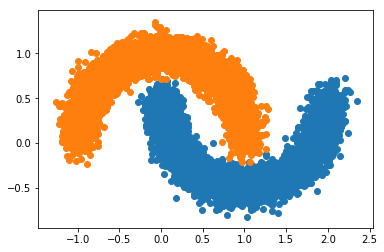

In [3]:
plt.scatter(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1])
plt.scatter(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1])

In [4]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons = y_moons.reshape(-1, 1)

In [5]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m) / batch_size)
learning_rate = 0.001

In [6]:
def fetch_batch(batch_size):
    indices = np.random.randint(m, size=batch_size)
    X_batch = X_moons_with_bias[indices]
    y_batch = y_moons[indices]
    return X_batch, y_batch

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)

error = y - y_proba
log_loss = tf.losses.log_loss(y, y_proba)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(log_loss)

In [8]:
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs): 
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss = log_loss.eval(feed_dict={X: X_moons_with_bias, y: y_moons})
        if epoch % 100 == 0:
            print epoch, 'Log loss', loss
    best_theta = theta.eval()
    print 'Best weights', best_theta, 'with loss', log_loss.eval(feed_dict={X: X_moons_with_bias, y: y_moons})

0 Log loss 0.87571853
100 Log loss 0.34096187
200 Log loss 0.29863873
300 Log loss 0.2806857
400 Log loss 0.27089286
500 Log loss 0.26497057
600 Log loss 0.261182
700 Log loss 0.25864434
800 Log loss 0.25688308
900 Log loss 0.2556416
Best weights [[ 0.6520386]
 [ 1.1609187]
 [-4.984826 ]] with loss 0.25473619


In [10]:
n

2